A lot of the operations in this notebook are adapted from: https://www.kaggle.com/andradaolteanu/birdcall-recognition-eda-and-audio-fe

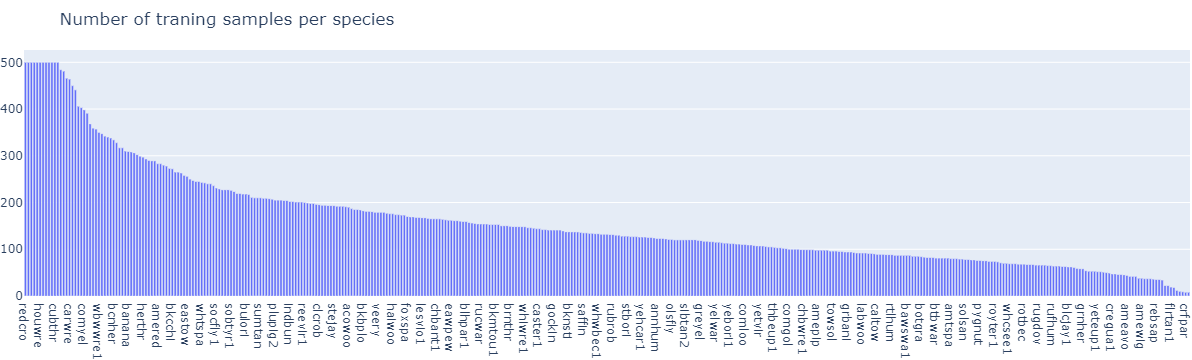

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('../input/birdclef-2021/train_metadata.csv',)
train.head()
import plotly.graph_objects as go

# Unique eBird codes
species = train['primary_label'].value_counts()

# Make bar chart
fig = go.Figure(data=[go.Bar(y=species.values, x=species.index)],
                layout=go.Layout(margin=go.layout.Margin(l=0, r=0, b=10, t=50)),
                )

# Show chart
fig.update_layout(title='Number of traning samples per species')
fig.show()

In [2]:
len(list(x for x in species.tolist() if x <= 50))

29

In [3]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import data
train_csv = pd.read_csv("../input/birdclef-2021/train_metadata.csv")

# Create some time features
train_csv['year'] = train_csv['date'].apply(lambda x: x.split('-')[0])
train_csv['month'] = train_csv['date'].apply(lambda x: x.split('-')[1])
train_csv['day_of_month'] = train_csv['date'].apply(lambda x: x.split('-')[2])

print("There are {:,} unique primary bird species in the dataset.".format(len(train_csv['primary_label'].unique())))

There are 397 unique primary bird species in the dataset.


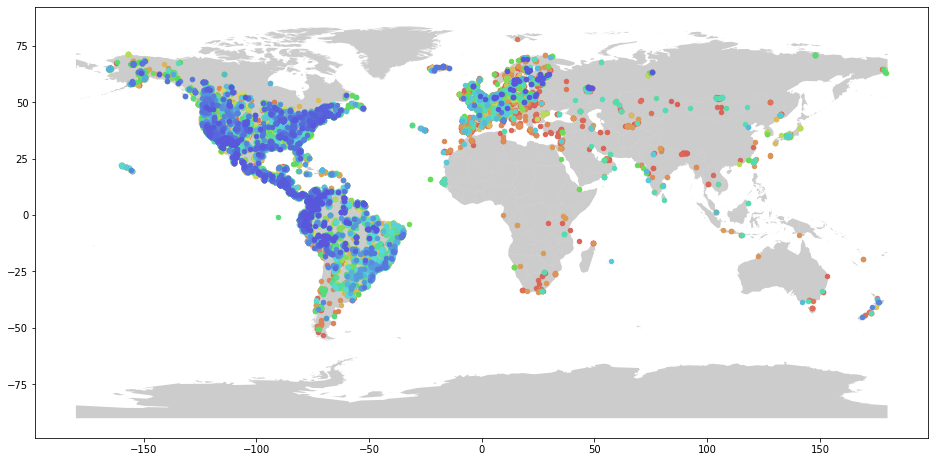

In [5]:
# !!! TAKES A LONG TIME TO RUN
# SHP file
world_map = gpd.read_file("../input/world-shapefile/world_shapefile.shp")

# Coordinate reference system
crs = {"init" : "epsg:4326"}

# Lat and Long need to be of type float, not object
data = train_csv[train_csv["latitude"] != "Not specified"]
data["latitude"] = data["latitude"].astype(float)
data["longitude"] = data["longitude"].astype(float)

# Create geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# Geo Dataframe
geo_df = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

# Create ID for species
species_id = geo_df["primary_label"].value_counts().reset_index()
species_id.insert(0, 'ID', range(0, 0 + len(species_id)))

species_id.columns = ["ID", "primary_label", "count"]

# Add ID to geo_df
geo_df = pd.merge(geo_df, species_id, how="left", on="primary_label")

# === PLOT ===
fig, ax = plt.subplots(figsize = (16, 10))
world_map.plot(ax=ax, alpha=0.4, color="grey")

palette = iter(sns.hls_palette(len(species_id)))

for i in range(264):
    geo_df[geo_df["ID"] == i].plot(ax=ax, markersize=20, color=next(palette), marker="o", label = species_id["primary_label"].values[i]);

In [6]:
train_csv = pd.read_csv("../input/birdclef-2021/train_metadata.csv")
train_csv

primary_label                           secondary_labels  \
0            acafly                                 ['amegfi']   
1            acafly                                         []   
2            acafly                                         []   
3            acafly                                ['whwbec1']   
4            acafly                                ['whwbec1']   
...             ...                                        ...   
62869        yetvir                                         []   
62870        yetvir                                         []   
62871        yetvir  ['amered', 'eawpew', 'norcar', 'reevir1']   
62872        yetvir                                         []   
62873        yetvir                       ['gamqua', 'whwdov']   

                                                    type  latitude  longitude  \
0                   ['begging call', 'call', 'juvenile']   35.3860   -84.1250   
1                                               ['call']    9.1334   -79.6501   
2                                               ['call']    5.7813   -75.7452   
3                                               ['call']    4.6717   -75.6283   
4                                               ['call']    4.6717   -75.6283   
...                                                  ...       ...        ...   
62869                          ['adult', 'male', 'song']   30.2150   -97.6505   
62870  ['life stage uncertain', 'sex uncertain', 'song']   42.3005   -72.5877   
62871                          ['adult', 'male', 'song']   42.3005   -72.5877   
62872                                      ['uncertain']   32.2357   -99.8811   
62873                          ['adult', 'male', 'song']   31.9060  -109.1543   

           scientific_name            common_name                      author  \
0      Empidonax virescens     Acadian Flycatcher                 Mike Nelson   
1      Empidonax virescens     Acadian Flycatcher           Allen T. Chartier   
2      Empidonax virescens     Acadian Flycatcher     Sergio Chaparro-Herrera   
3      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
4      Empidonax virescens     Acadian Flycatcher  Oscar Humberto Marin-Gomez   
...                    ...                    ...                         ...   
62869     Vireo flavifrons  Yellow-throated Vireo                Caleb Helsel   
62870     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62871     Vireo flavifrons  Yellow-throated Vireo       Christopher McPherson   
62872     Vireo flavifrons  Yellow-throated Vireo                 Brad Banner   
62873     Vireo flavifrons  Yellow-throated Vireo          Richard E. Webster   

             date      filename  \
0      2012-08-12  XC109605.ogg   
1      2000-12-26   XC11209.ogg   
2      2012-01-10  XC127032.ogg   
3      2009-06-19  XC129974.ogg   
4      2009-06-19  XC129981.ogg   
...           ...           ...   
62869  2020-07-10  XC591680.ogg   
62870  2019-05-31  XC600085.ogg   
62871  2020-06-02  XC602701.ogg   
62872  2019-04-27  XC614733.ogg   
62873  2020-05-26  XC615888.ogg   

                                                 license  rating   time  \
0      Creative Commons Attribution-NonCommercial-Sha...     2.5  09:30   
1      Creative Commons Attribution-NonCommercial-Sha...     3.0      ?   
2      Creative Commons Attribution-NonCommercial-Sha...     3.0  15:20   
3      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
4      Creative Commons Attribution-NonCommercial-Sha...     3.5  07:50   
...                                                  ...     ...    ...   
62869  Creative Commons Attribution-NonCommercial-Sha...     1.0  08:30   
62870  Creative Commons Attribution-NonCommercial-Sha...     5.0  09:30   
62871  Creative Commons Attribution-NonCommercial-Sha...     4.5  08:30   
62872  Creative Commons Attribution-NonCommercial-Sha...     4.0  17:30   
62873  Creative Commo

In [7]:
# Create Full Path so we can access data more easily
base_dir = '../input/birdclef-2021/train_short_audio/'
train_csv['full_path'] = base_dir + train_csv['primary_label'] + '/' + train_csv['filename']

# Now let's sample a fiew audio files
kebtou1 = train_csv[train_csv['primary_label'] == "kebtou1"].sample(1, random_state = 33)['full_path'].values[0]
houwre = train_csv[train_csv['primary_label'] == "houwre"].sample(1, random_state = 33)['full_path'].values[0]
relpar = train_csv[train_csv['primary_label'] == "relpar"].sample(1, random_state = 33)['full_path'].values[0]

bird_sample_list = ["kebtou1", "houwre", "relpar"]

In [9]:
bird_sample_list

['kebtou1', 'houwre', 'relpar']

In [10]:
# Importing the 3 files
y_kebtou1, sr_kebtou1 = librosa.load(kebtou1)
audio_kebtou1, _ = librosa.effects.trim(y_kebtou1)

y_houwre, sr_houwre = librosa.load(houwre)
audio_houwre, _ = librosa.effects.trim(y_houwre)

y_relpar, sr_relpar = librosa.load(relpar)
audio_relpar, _ = librosa.effects.trim(y_relpar)


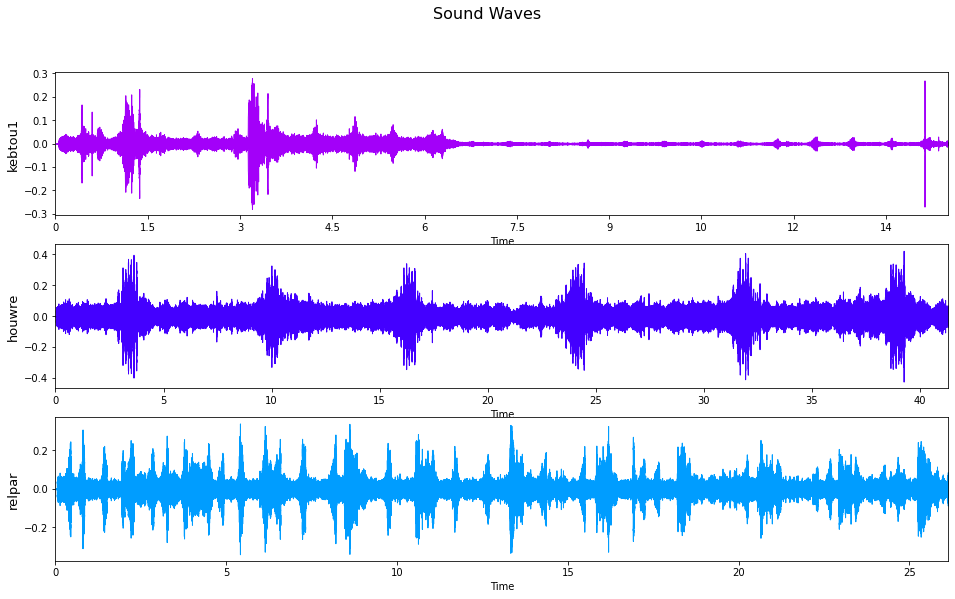

In [11]:
fig, ax = plt.subplots(3, figsize = (16, 9))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = audio_kebtou1, sr = sr_kebtou1, color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_houwre, sr = sr_houwre, color = "#4300FF", ax=ax[1])
librosa.display.waveplot(y = audio_relpar, sr = sr_relpar, color = "#009DFF", ax=ax[2])

for i, name in zip(range(5), bird_sample_list):
    ax[i].set_ylabel(name, fontsize=13)

Fourier Transform: function that gets a signal in the time domain as input, and outputs its decomposition into frequencies. Transform both the y-axis (frequency) to log scale, and the “colour” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [12]:
bird_sample_list

['kebtou1', 'houwre', 'relpar']

In [13]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_kebtou1 = np.abs(librosa.stft(audio_kebtou1, n_fft = n_fft, hop_length = hop_length))
D_houwre = np.abs(librosa.stft(audio_houwre, n_fft = n_fft, hop_length = hop_length))
D_relpar = np.abs(librosa.stft(audio_relpar, n_fft = n_fft, hop_length = hop_length))

Spectrogram: visual representation of the spectrum of frequencies of a signal as it varies with time

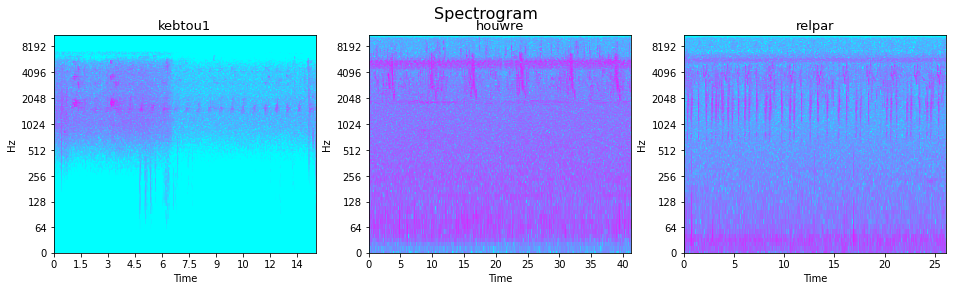

In [15]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB_kebtou1 = librosa.amplitude_to_db(D_kebtou1, ref = np.max)
DB_houwre = librosa.amplitude_to_db(D_houwre, ref = np.max)
DB_relpar = librosa.amplitude_to_db(D_relpar, ref = np.max)

# === PLOT ===
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Spectrogram', fontsize=16)

librosa.display.specshow(DB_kebtou1, sr = sr_kebtou1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[0])
librosa.display.specshow(DB_houwre, sr = sr_houwre, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[1])
librosa.display.specshow(DB_relpar, sr = sr_relpar, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[2])

for i, name in zip(range(0, 3), bird_sample_list):
    ax[i].set_title(name, fontsize=13) 

Melspec: The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

In [16]:
bird_sample_list

['kebtou1', 'houwre', 'relpar']

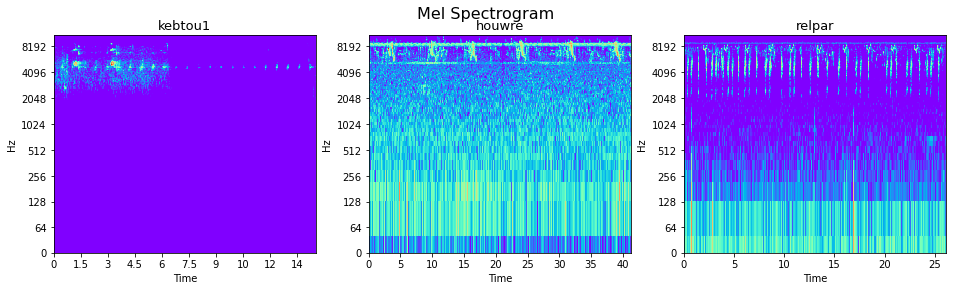

In [17]:
# Create the Mel Spectrograms
S_kebtou1 = librosa.feature.melspectrogram(y_kebtou1, sr=sr_kebtou1)
S_DB_kebtou1 = librosa.amplitude_to_db(S_kebtou1, ref=np.max)

S_houwre = librosa.feature.melspectrogram(y_houwre, sr=sr_houwre)
S_DB_houwre = librosa.amplitude_to_db(S_houwre, ref=np.max)

S_relpar = librosa.feature.melspectrogram(y_relpar, sr=sr_relpar)
S_DB_relpar = librosa.amplitude_to_db(S_relpar, ref=np.max)

# === PLOT ====
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Mel Spectrogram', fontsize=16)

librosa.display.specshow(S_DB_kebtou1, sr = sr_kebtou1, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0])
librosa.display.specshow(S_DB_houwre, sr = sr_houwre, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1])
librosa.display.specshow(S_DB_relpar, sr = sr_relpar, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[2])

for i, name in zip(range(0, 3), bird_sample_list):
    ax[i].set_title(name, fontsize=13)

Zero Crossing Rate: the rate at which the signal changes from positive to negative or back.

In [18]:
for relpar_i in train_csv[train_csv['primary_label'] == "relpar"].sample(10, random_state = 33)['full_path'].values:
    y_relpar_i, sr_relpar_i = librosa.load(relpar_i)
    audio_relpar_i, _ = librosa.effects.trim(y_relpar_i)
    zero_relpar_i = librosa.zero_crossings(audio_relpar_i, pad=False)
    print(sum(zero_relpar_i))

177011
361624
41041
143295
950122
2949
497421
485385
84918
102374


In [19]:
# Total zero_crossings in our 1 song
zero_kebtou1 = librosa.zero_crossings(audio_kebtou1, pad=False)
zero_houwre = librosa.zero_crossings(audio_houwre, pad=False)
zero_relpar = librosa.zero_crossings(audio_relpar, pad=False)

zero_birds_list = [zero_kebtou1, zero_houwre, zero_relpar]

for bird, name in zip(zero_birds_list, bird_sample_list):
    print("{} change rate is {:,}".format(name, sum(bird)))

kebtou1 change rate is 67,610
houwre change rate is 361,252
relpar change rate is 177,011


Harmonics: characteristics that represent the sound *colour*

Perceptrual: shock wave represents the sound *rhythm and emotion*

Text(0.5, 1.0, 'Harmonics and Perceptrual : Keel-billed Toucan')

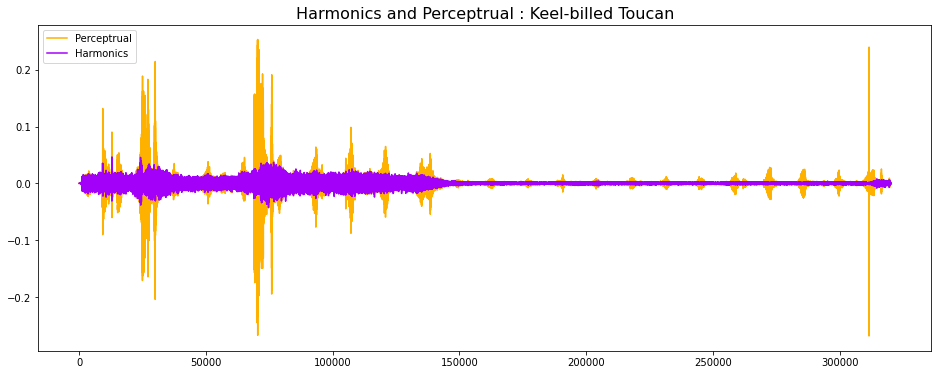

In [20]:
y_harm_kebtou1, y_perc_kebtou1 = librosa.effects.hpss(audio_kebtou1)

plt.figure(figsize = (16, 6))
plt.plot(y_perc_kebtou1, color = '#FFB100')
plt.plot(y_harm_kebtou1, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : Keel-billed Toucan", fontsize=16)

Text(0.5, 1.0, 'Harmonics and Perceptrual : House Wren')

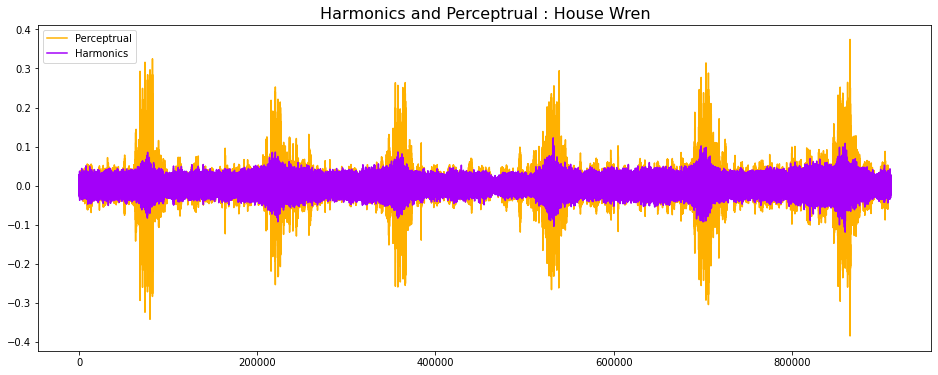

In [21]:
y_harm_houwre, y_perc_houwre = librosa.effects.hpss(audio_houwre)

plt.figure(figsize = (16, 6))
plt.plot(y_perc_houwre, color = '#FFB100')
plt.plot(y_harm_houwre, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : House Wren", fontsize=16)

Text(0.5, 1.0, 'Harmonics and Perceptrual : Red-lored Parrot')

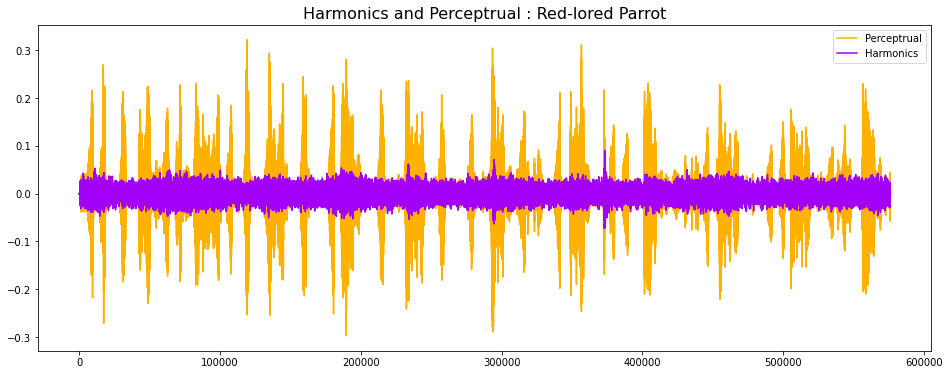

In [22]:
y_harm_relpar, y_perc_relpar = librosa.effects.hpss(audio_relpar)

plt.figure(figsize = (16, 6))
plt.plot(y_perc_relpar, color = '#FFB100')
plt.plot(y_harm_relpar, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : Red-lored Parrot", fontsize=16)

Spectral Centroid where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [23]:
bird_sample_list

['kebtou1', 'houwre', 'relpar']

In [25]:
# Calculate the Spectral Centroids
kebtou1_spectral_centroids = librosa.feature.spectral_centroid(audio_kebtou1)[0]
houwre_spectral_centroids = librosa.feature.spectral_centroid(audio_houwre)[0]
relpar_spectral_centroids = librosa.feature.spectral_centroid(audio_relpar)[0]

# Shape is a vector
# print('Centroids:', kebtou1_spectral_centroids, '\n')
print('Shape of Spectral Centroids:', kebtou1_spectral_centroids.shape, '\n')
# print('Centroids:', houwre_spectral_centroids, '\n')
print('Shape of Spectral Centroids:', houwre_spectral_centroids.shape, '\n')
# print('Centroids:', relpar_spectral_centroids, '\n')
print('Shape of Spectral Centroids:', relpar_spectral_centroids.shape, '\n')

# Computing the time variable for visualization
kebtou1_frames = range(len(kebtou1_spectral_centroids))
houwre_frames = range(len(houwre_spectral_centroids))
relpar_frames = range(len(relpar_spectral_centroids))

# Converts frame counts to time (seconds)
kebtou1_t = librosa.frames_to_time(kebtou1_frames)
houwre_t = librosa.frames_to_time(houwre_frames)
relpar_t = librosa.frames_to_time(relpar_frames)

print('kebtou1_frames:', kebtou1_frames, '\n')
# print('kebtou1_t:', kebtou1_t)
print('houwre_frames:', houwre_frames, '\n')
# print('houwre_t:', houwre_t)
print('relpar_frames:', relpar_frames, '\n')
# print('relpar_t:', relpar_t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Shape of Spectral Centroids: (626,) 

Shape of Spectral Centroids: (1780,) 

Shape of Spectral Centroids: (1126,) 

kebtou1_frames: range(0, 626) 

houwre_frames: range(0, 1780) 

relpar_frames: range(0, 1126) 



Text(0.5, 1.0, 'Spectral Centroid: Red-lored Parrot')

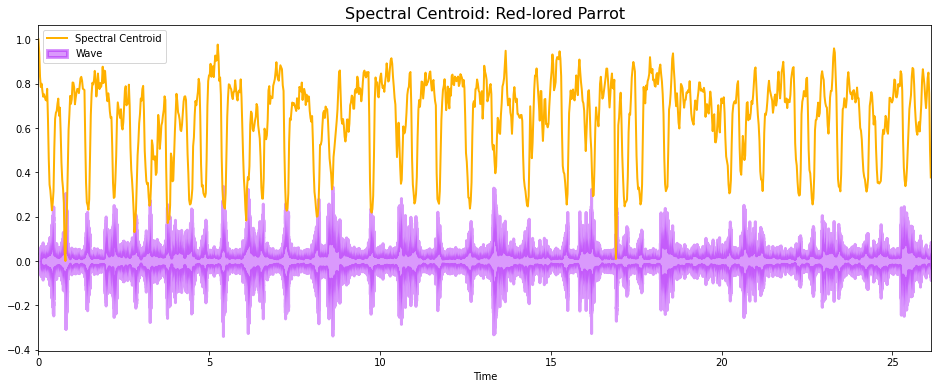

In [28]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_relpar, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(relpar_t, normalize(relpar_spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: Red-lored Parrot", fontsize=16)

Text(0.5, 1.0, 'Spectral Centroid: House Wren')

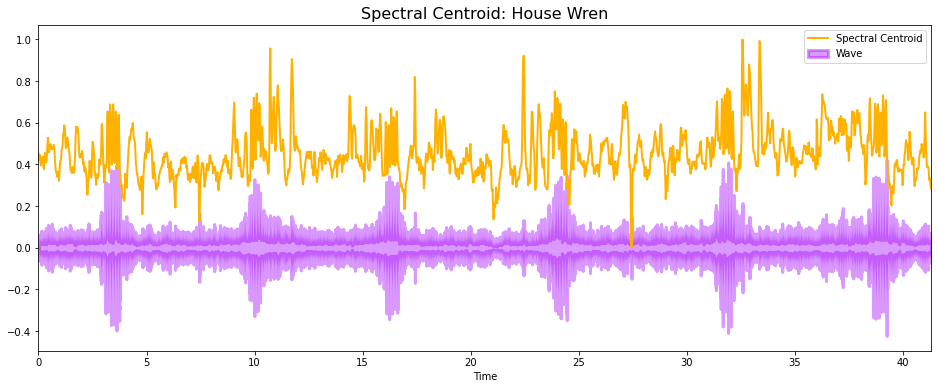

In [29]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_houwre, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(houwre_t, normalize(houwre_spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: House Wren", fontsize=16)

Text(0.5, 1.0, 'Spectral Centroid: Keel-billed Toucan')

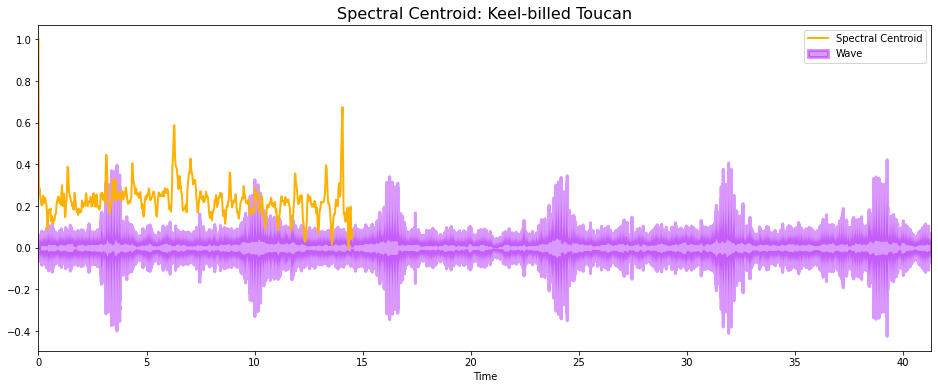

In [30]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_houwre, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(kebtou1_t, normalize(kebtou1_spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: Keel-billed Toucan", fontsize=16)

Chroma Frequencies: representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chromas) of the musical octave.

In [31]:
bird_sample_list

['kebtou1', 'houwre', 'relpar']

chroma_stft kebtou1 shape: (12, 65)
chroma_stft houwre shape: (12, 183)
chroma_stft relpar shape: (12, 116)


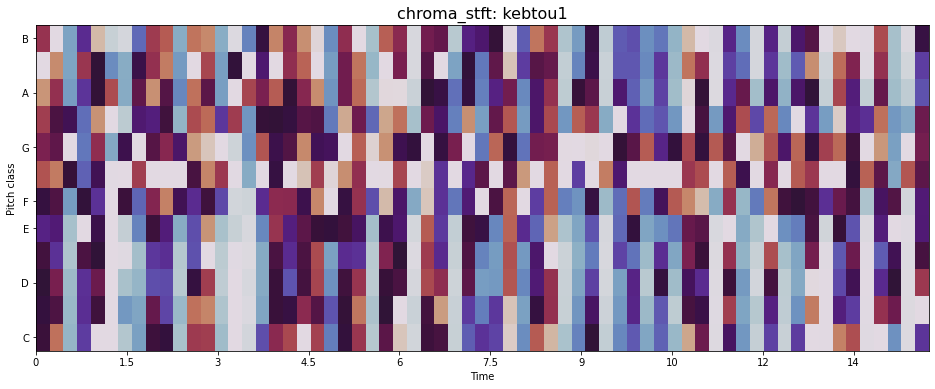

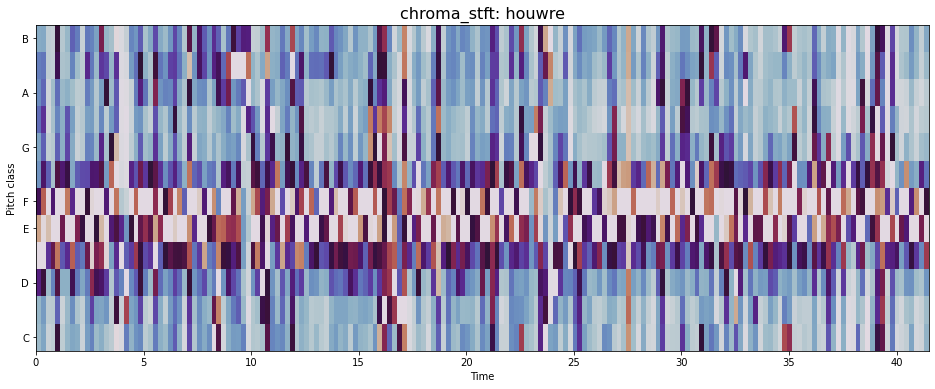

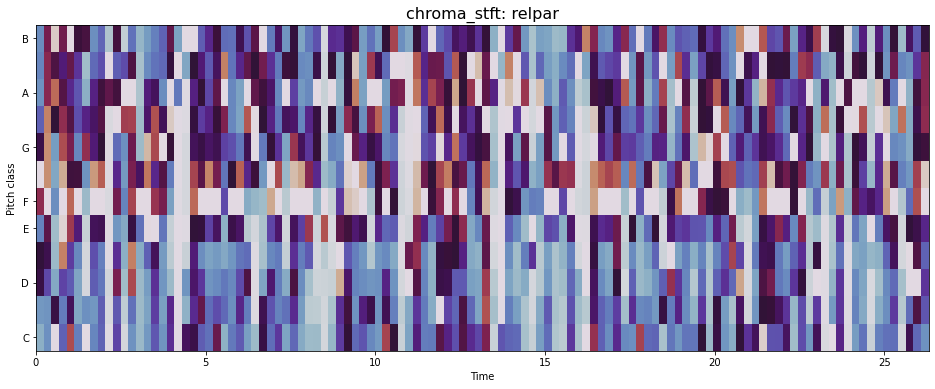

In [32]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

kebtou1_chroma_stft = librosa.feature.chroma_stft(audio_kebtou1, sr=sr_kebtou1, hop_length=hop_length)
print('chroma_stft kebtou1 shape:', kebtou1_chroma_stft.shape)
houwre_chroma_stft = librosa.feature.chroma_stft(audio_houwre, sr=sr_kebtou1, hop_length=hop_length)
print('chroma_stft houwre shape:', houwre_chroma_stft.shape)
relpar_chroma_stft = librosa.feature.chroma_stft(audio_relpar, sr=sr_relpar, hop_length=hop_length)
print('chroma_stft relpar shape:', relpar_chroma_stft.shape)

plt.figure(figsize=(16, 6))
plt.title("chroma_stft: kebtou1", fontsize=16)
librosa.display.specshow(kebtou1_chroma_stft, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.figure(figsize=(16, 6))
plt.title("chroma_stft: houwre", fontsize=16)
librosa.display.specshow(houwre_chroma_stft, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')
plt.figure(figsize=(16, 6))
plt.title("chroma_stft: relpar", fontsize=16)
librosa.display.specshow(relpar_chroma_stft, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')


Spectral Rolloff: measure of the *shape of the signal*. It represents the frequency below which a specified percentage of the total spectral energy (e.g. 85%) lies.

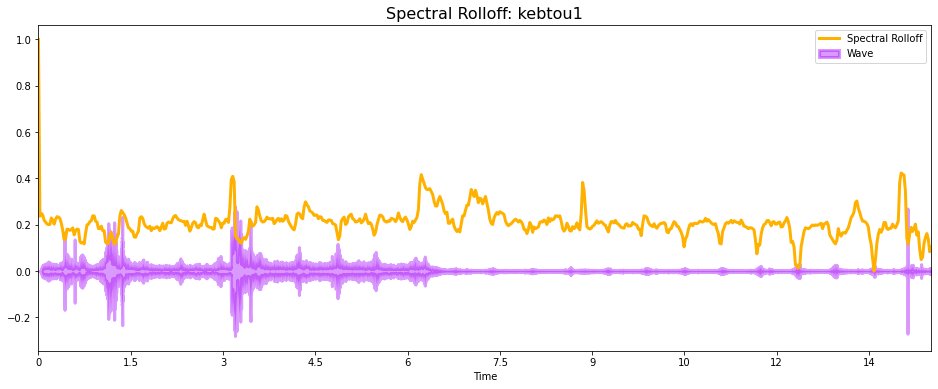

In [34]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_kebtou1)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_kebtou1, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: kebtou1", fontsize=16)

Text(0.5, 1.0, 'Spectral Rolloff: houwre')

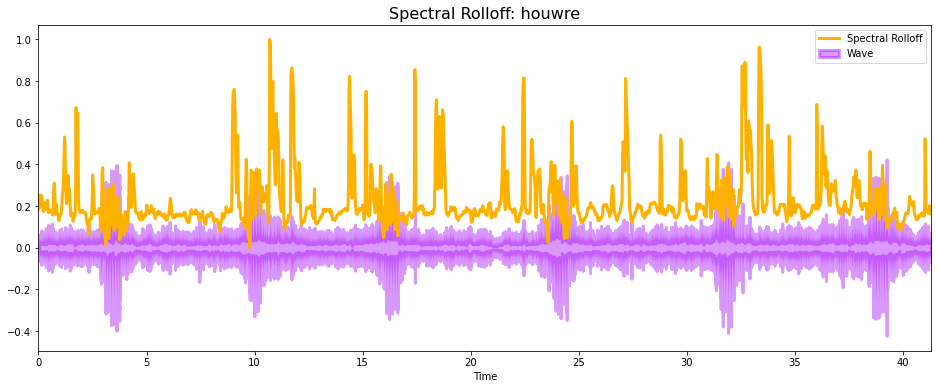

In [35]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_houwre)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_houwre, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: houwre", fontsize=16)

Text(0.5, 1.0, 'Spectral Rolloff: relpar')

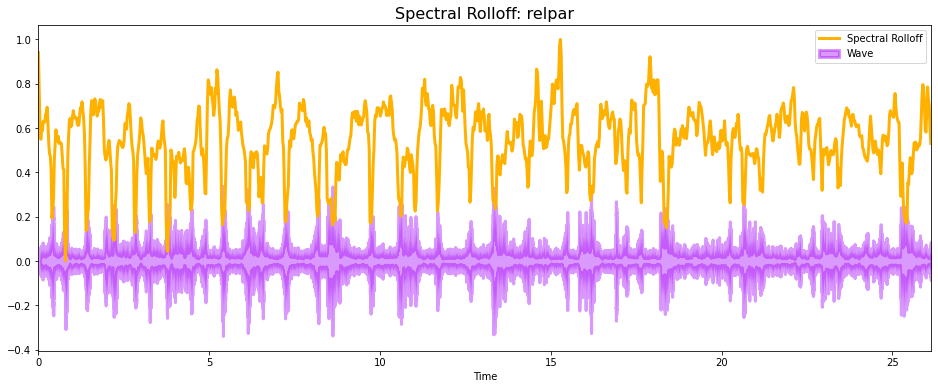

In [36]:
spectral_rolloff = librosa.feature.spectral_rolloff(audio_relpar)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_relpar, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: relpar", fontsize=16)